In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse

In [2]:
df = pd.read_csv('../dataset/malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
df.tail()

,url,type
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [5]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


## Check for NaN values

In [6]:
df.isna().sum()

url     0
type    0
dtype: int64

In [7]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [8]:
df.duplicated().sum()

10066

We doesn't have any missing values, but we have 10066 duplicated.

## Check duplicates rows

In [9]:
df[df.duplicated()]

,url,type
876,http://9779.info/%E4%BA%94%E8%B0%B7%E6%9D%82%E...,malware
1361,http://portal.dddgaming.com/docs/rules/15022/c...,malware
1822,http://www.824555.com/app/member/SportOption.p...,malware
1989,http://chinacxyy.com/newscodejs.asp?lm2=201&li...,malware
2963,http://www.bruynzeelmultipanel.be/index.php?op...,defacement
...,...,...
535215,http://www.habbocreditosparati.blogspot.com/,phishing
535217,http://mundovirtualhabbo.blogspot.com/2009_01_...,phishing
535218,http://aijcs.blogspot.com/2005/03/colourful-li...,phishing
590597,bin/webscr?cmd=_login-,benign


In [10]:
df_duplicated = df[df.duplicated()]

In [11]:
count_duplicated = df_duplicated['type'].value_counts()
count_duplicated

type
malware       8875
defacement    1149
benign          23
phishing        19
Name: count, dtype: int64

Text(0, 0.5, 'Count')

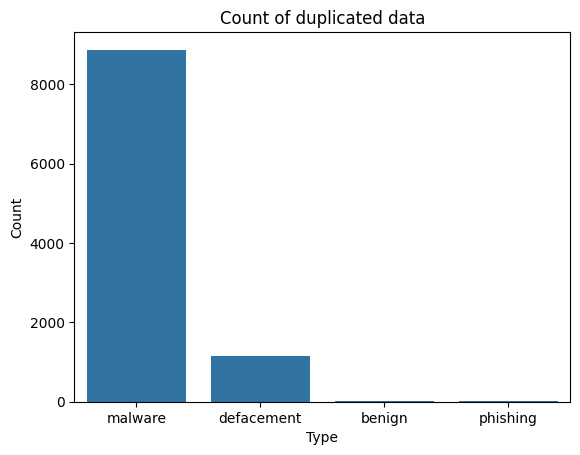

In [12]:
sns.barplot(x = count_duplicated.index, y = count_duplicated)
plt.title('Count of duplicated data')
plt.xlabel('Type')
plt.ylabel('Count')

## Now taking a look to original data

In [13]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


Text(0, 0.5, 'Count')

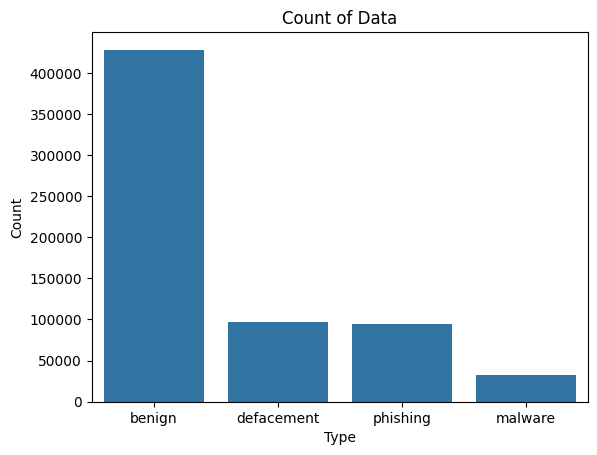

In [15]:
count_data = df['type'].value_counts()
sns.barplot(x=count_data.index, y=count_data.values)
plt.title('Count of Data')
plt.xlabel('Type')
plt.ylabel('Count')